# Wine Classification 
This notebook builds a neural network model that can predict the class of wine given the 13 measured parameters

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
pd.set_option("display.max_rows", None, "display.max_columns", None)
%matplotlib inline 

In [2]:
 #Load the wine dataset in a variable named raw_data
raw_data = load_wine()

#Convert the wine dataset to a data frame and get features.
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features

#Get the target values
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
target_names = raw_data['target_names']
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [3]:
data['class'].unique()

array(['class_0', 'class_1', 'class_2'], dtype=object)

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


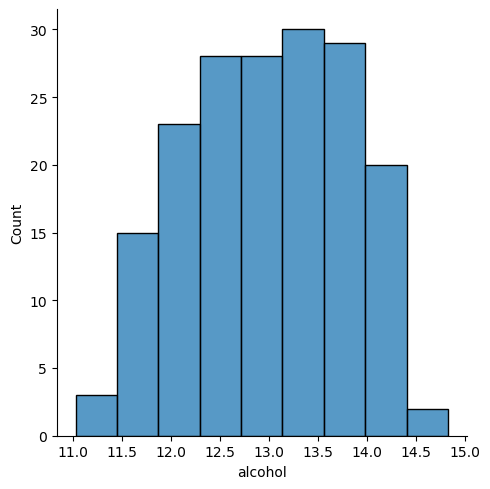

In [5]:
sns.displot(data['alcohol'],kde=0) #distribution of alcohol content among all of the wines

In [6]:
data.shape

(178, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
class                           0
dtype: int64

In [9]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(raw_data['data'],raw_data['target'], test_size=0.3, random_state=42)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

124  samples in training data
 54  samples in test data



In [10]:
# Instantiate the model
model = MLPClassifier(hidden_layer_sizes=(50,50,50),activation='relu', solver='adam', random_state=1, max_iter=3000, verbose=True).fit(X_train, y_train)

# Fit the model
model.fit(X_train, y_train)

# Make pickle file of our model
pickle.dump(model, open("model.pkl", "wb"))

Iteration 1, loss = 26.16076674
Iteration 2, loss = 26.05295925
Iteration 3, loss = 23.35527994
Iteration 4, loss = 17.78857492
Iteration 5, loss = 12.93221375
Iteration 6, loss = 14.76845331
Iteration 7, loss = 15.84893232
Iteration 8, loss = 13.58065896
Iteration 9, loss = 8.56199341
Iteration 10, loss = 16.01360190
Iteration 11, loss = 19.53544496
Iteration 12, loss = 20.71319932
Iteration 13, loss = 20.62331325
Iteration 14, loss = 19.48991509
Iteration 15, loss = 17.03033271
Iteration 16, loss = 12.89523580
Iteration 17, loss = 7.48564608
Iteration 18, loss = 7.11970588
Iteration 19, loss = 9.72348582
Iteration 20, loss = 9.70038741
Iteration 21, loss = 8.27044208
Iteration 22, loss = 8.58623813
Iteration 23, loss = 9.14069225
Iteration 24, loss = 7.33427247
Iteration 25, loss = 3.63150696
Iteration 26, loss = 5.01608808
Iteration 27, loss = 6.75363043
Iteration 28, loss = 7.06884440
Iteration 29, loss = 6.11647826
Iteration 30, loss = 4.62094526
Iteration 31, loss = 5.87056677
It

Iteration 270, loss = 0.42900613
Iteration 271, loss = 0.42755394
Iteration 272, loss = 0.42641477
Iteration 273, loss = 0.42479338
Iteration 274, loss = 0.42356598
Iteration 275, loss = 0.42233882
Iteration 276, loss = 0.42101796
Iteration 277, loss = 0.41945257
Iteration 278, loss = 0.41804042
Iteration 279, loss = 0.41676102
Iteration 280, loss = 0.41538648
Iteration 281, loss = 0.41409050
Iteration 282, loss = 0.41280169
Iteration 283, loss = 0.41138815
Iteration 284, loss = 0.41479878
Iteration 285, loss = 0.43541515
Iteration 286, loss = 0.41957048
Iteration 287, loss = 0.41318919
Iteration 288, loss = 0.41282945
Iteration 289, loss = 0.40608937
Iteration 290, loss = 0.41104110
Iteration 291, loss = 0.40236509
Iteration 292, loss = 0.40682483
Iteration 293, loss = 0.39835858
Iteration 294, loss = 0.40187987
Iteration 295, loss = 0.39524559
Iteration 296, loss = 0.39855594
Iteration 297, loss = 0.39272312
Iteration 298, loss = 0.39433040
Iteration 299, loss = 0.38955527
Iteration 

Iteration 524, loss = 0.13824274
Iteration 525, loss = 0.13804807
Iteration 526, loss = 0.13785573
Iteration 527, loss = 0.13767014
Iteration 528, loss = 0.13749007
Iteration 529, loss = 0.13732082
Iteration 530, loss = 0.13716396
Iteration 531, loss = 0.13702580
Iteration 532, loss = 0.13691329
Iteration 533, loss = 0.13682956
Iteration 534, loss = 0.13678677
Iteration 535, loss = 0.13676406
Iteration 536, loss = 0.13676225
Iteration 537, loss = 0.13668641
Iteration 538, loss = 0.13650983
Iteration 539, loss = 0.13612661
Iteration 540, loss = 0.13562483
Iteration 541, loss = 0.13511906
Iteration 542, loss = 0.13476724
Iteration 543, loss = 0.13461832
Iteration 544, loss = 0.13461329
Iteration 545, loss = 0.13462457
Iteration 546, loss = 0.13453394
Iteration 547, loss = 0.13430392
Iteration 548, loss = 0.13396344
Iteration 549, loss = 0.13361849
Iteration 550, loss = 0.13335833
Iteration 551, loss = 0.13320323
Iteration 552, loss = 0.13311657
Iteration 553, loss = 0.13303926
Iteration 

Iteration 6, loss = 14.76845331
Iteration 7, loss = 15.84893232
Iteration 8, loss = 13.58065896
Iteration 9, loss = 8.56199341
Iteration 10, loss = 16.01360190
Iteration 11, loss = 19.53544496
Iteration 12, loss = 20.71319932
Iteration 13, loss = 20.62331325
Iteration 14, loss = 19.48991509
Iteration 15, loss = 17.03033271
Iteration 16, loss = 12.89523580
Iteration 17, loss = 7.48564608
Iteration 18, loss = 7.11970588
Iteration 19, loss = 9.72348582
Iteration 20, loss = 9.70038741
Iteration 21, loss = 8.27044208
Iteration 22, loss = 8.58623813
Iteration 23, loss = 9.14069225
Iteration 24, loss = 7.33427247
Iteration 25, loss = 3.63150696
Iteration 26, loss = 5.01608808
Iteration 27, loss = 6.75363043
Iteration 28, loss = 7.06884440
Iteration 29, loss = 6.11647826
Iteration 30, loss = 4.62094526
Iteration 31, loss = 5.87056677
Iteration 32, loss = 6.49436664
Iteration 33, loss = 5.22800997
Iteration 34, loss = 3.16012440
Iteration 35, loss = 3.37761573
Iteration 36, loss = 3.27518350
It

Iteration 335, loss = 0.29716295
Iteration 336, loss = 0.29646679
Iteration 337, loss = 0.29146398
Iteration 338, loss = 0.29103216
Iteration 339, loss = 0.28691432
Iteration 340, loss = 0.28549326
Iteration 341, loss = 0.28298158
Iteration 342, loss = 0.28025586
Iteration 343, loss = 0.27893729
Iteration 344, loss = 0.27648184
Iteration 345, loss = 0.27479550
Iteration 346, loss = 0.27190424
Iteration 347, loss = 0.26982462
Iteration 348, loss = 0.26837759
Iteration 349, loss = 0.26540120
Iteration 350, loss = 0.26429475
Iteration 351, loss = 0.26171853
Iteration 352, loss = 0.25988426
Iteration 353, loss = 0.25823652
Iteration 354, loss = 0.25588392
Iteration 355, loss = 0.25428651
Iteration 356, loss = 0.25206269
Iteration 357, loss = 0.25039894
Iteration 358, loss = 0.24853865
Iteration 359, loss = 0.24653118
Iteration 360, loss = 0.24490767
Iteration 361, loss = 0.24290606
Iteration 362, loss = 0.24128948
Iteration 363, loss = 0.23943489
Iteration 364, loss = 0.23767016
Iteration 

Iteration 622, loss = 0.11739235
Iteration 623, loss = 0.11680884
Iteration 624, loss = 0.11639804
Iteration 625, loss = 0.11613478
Iteration 626, loss = 0.11582380
Iteration 627, loss = 0.11537182
Iteration 628, loss = 0.11482808
Iteration 629, loss = 0.11435479
Iteration 630, loss = 0.11399631
Iteration 631, loss = 0.11368470
Iteration 632, loss = 0.11333718
Iteration 633, loss = 0.11289013
Iteration 634, loss = 0.11238972
Iteration 635, loss = 0.11187638
Iteration 636, loss = 0.11140762
Iteration 637, loss = 0.11099175
Iteration 638, loss = 0.11061630
Iteration 639, loss = 0.11027961
Iteration 640, loss = 0.10996510
Iteration 641, loss = 0.10962582
Iteration 642, loss = 0.10916003
Iteration 643, loss = 0.10858911
Iteration 644, loss = 0.10803839
Iteration 645, loss = 0.10759902
Iteration 646, loss = 0.10724171
Iteration 647, loss = 0.10691763
Iteration 648, loss = 0.10658289
Iteration 649, loss = 0.10616354
Iteration 650, loss = 0.10567215
Iteration 651, loss = 0.10514290
Iteration 

In [11]:
print(model.score(X_train, y_train))

0.9838709677419355


In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [13]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [14]:
print(model.score(X_test, y_test))

0.9814814814814815


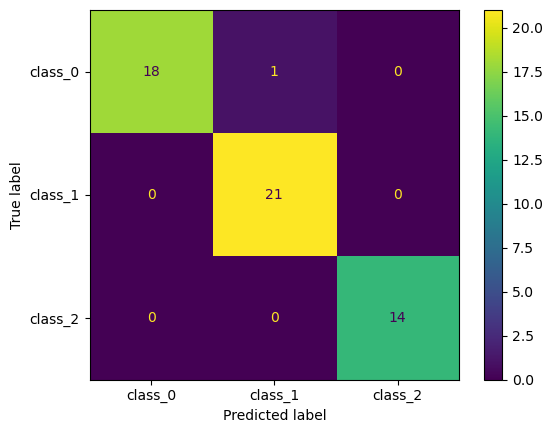

              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
plt.show()
print(classification_report(y_test, y_pred, target_names=target_names))
